In [42]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [43]:
import h5py
import numpy as np
from astropy.units import deg
from os import path
#from lenstools import GaussianNoiseGenerator, ConvergenceMap
#from scipy.ndimage import gaussian_filter

I want to study the global property of the clone dsets that I made. Specifically, 
* Power spectra
* Peak counts
* General pixel counts

I also want to see if these have any trends with cosmology, esp compared to the original maps. 

Same as the other notebook, but loads up ones that were computed as a batch job. 

In [44]:
orig_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTraining.hdf5'
grf_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTrainingGRF_smooth_1.0_noise_0.3.hdf5'
clone_fname = '/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise0.0_v3.hdf5'
#clone_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRFNoise1.0.hdf5'

In [45]:
N = 200
all_ys = np.zeros((N, 2))
for boxno in range(N):
    print(boxno)
    boxname = 'Box%03d'%boxno
    with h5py.File(orig_fname, 'r') as f:
        y = f[boxname]['Y'][0,:]
        
    all_ys[boxno] = y.squeeze()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [46]:
directory = '/home/users/swmclau2/scratch/clone_maps/'
ps_arrs = np.load(path.join(directory, 'ps_arrs_white_1_v6.npy'), allow_pickle=True)
#pc_arrs = np.load(path.join(directory, 'pc_arrs_white_1_v6.npy'), allow_pickle=True)
#pdf_arrs = np.load(path.join(directory, 'pdf_arrs_white_1_v6.npy'), allow_pickle=True)
#pcf_arrs = np.load(path.join(directory, 'pcf_arrs_white_0_v6.npy'), allow_pickle=True)


In [47]:
norm_all_ys = (all_ys-np.min(all_ys, axis=0))/(np.max(all_ys,axis=0)-np.min(all_ys,axis=0))

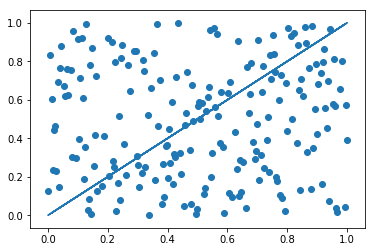

In [48]:
r = 0.5#0.5
slope_vec = np.array([r, 1-r])
slope = slope_vec[1]/slope_vec[0]
plt.scatter(norm_all_ys[:,0], norm_all_ys[:,1])
plt.plot(norm_all_ys[:,0], slope*norm_all_ys[:,0])

In [49]:
projection = np.dot( norm_all_ys, slope_vec)
sorted_y_idxs = np.argsort(projection)
#sorted_y_idxs = np.argsort(all_ys[:,1])

In [50]:
cmap = sns.cubehelix_palette(N, start=2, rot=0, dark=0.1, light=.95)

In [51]:
#_nu = np.linspace(-5, 10, 200)
_nu = np.linspace(-0.025, .05, 200)

nu = (_nu[1:]+_nu[:-1])/2.0

_l = np.linspace(128, 128**2, 180)
l = (_l[1:]+_l[:-1])/2.0

https://bertvandenbroucke.netlify.app/2019/05/24/computing-a-power-spectrum-in-python/

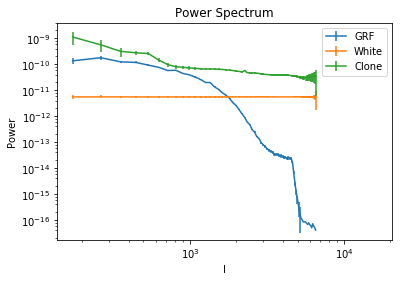

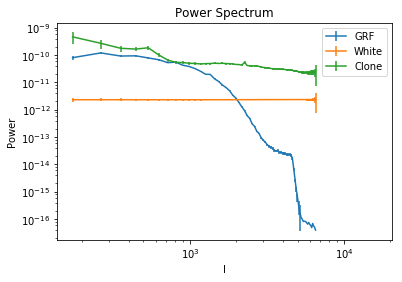

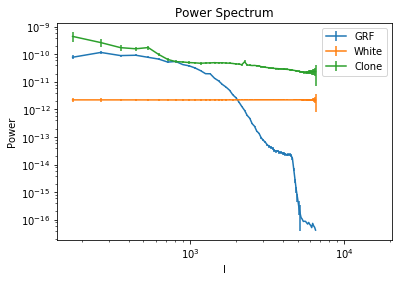

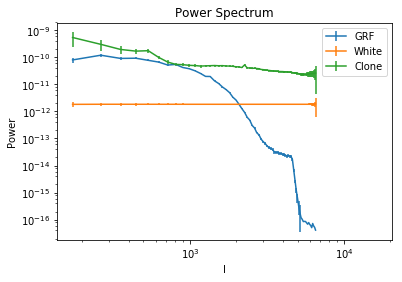

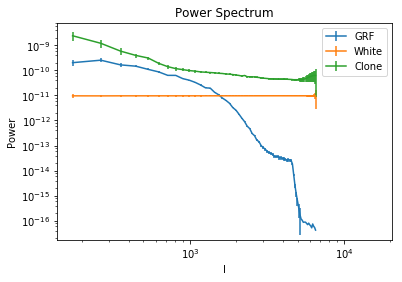

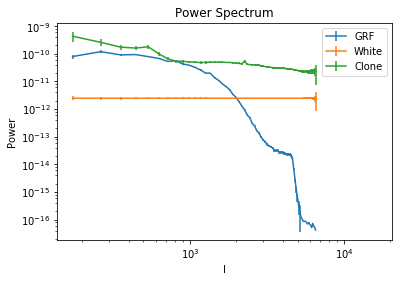

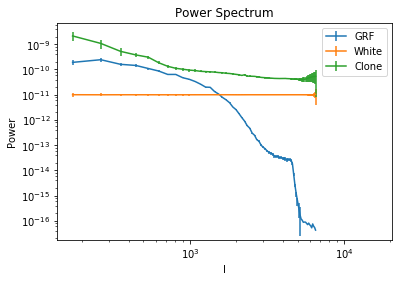

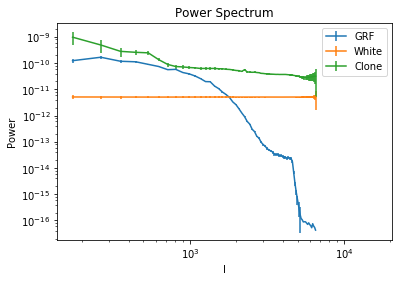

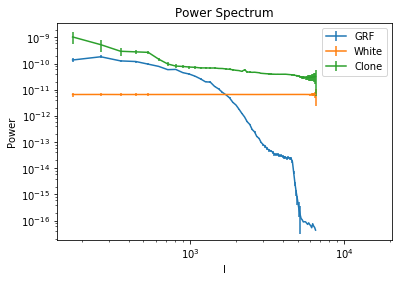

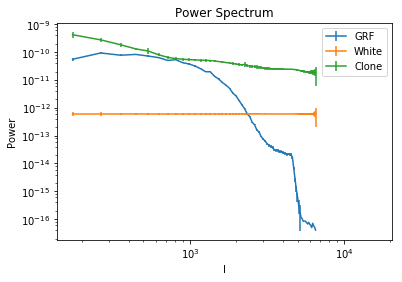

In [52]:
for i in xrange(10):
    #plt.errorbar(l, ps_arrs[0][i].mean(axis=0), yerr=ps_arrs[0][i].std(axis=0),
    #            label ='Orig')
    plt.errorbar(l, ps_arrs[1][i].mean(axis=0), yerr=ps_arrs[1][i].std(axis=0),
                label = 'GRF')
    plt.errorbar(l, ps_arrs[2][i].mean(axis=0), yerr=ps_arrs[2][i].std(axis=0),
                label = 'White')
    plt.errorbar(l, ps_arrs[3][i].mean(axis=0), yerr=ps_arrs[3][i].std(axis=0),
                label = 'Clone')
    plt.title('Power Spectrum')
    plt.xlabel('l')
    plt.ylabel('Power')
    plt.loglog();
    plt.legend(loc='best')
    #plt.ylim([1e-10,1e-7])
    plt.show()

In [53]:
ang_bins = np.logspace(np.log10(0.05), np.log10(16), 21)
abc = (ang_bins[1:]+ang_bins[:-1])/2.0

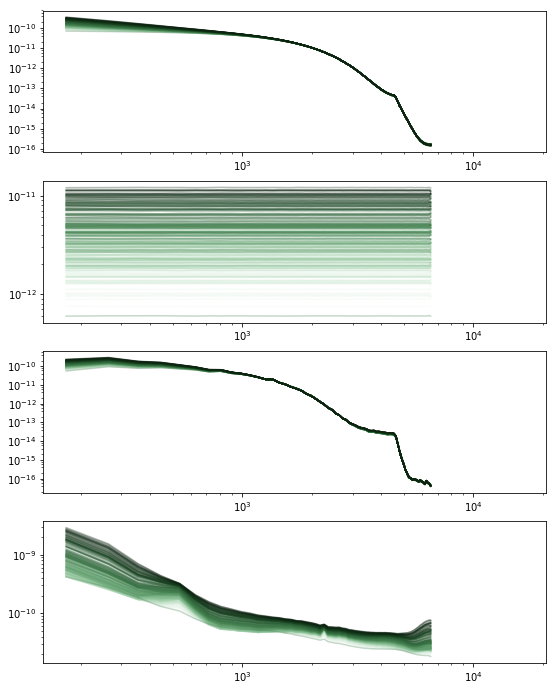

In [54]:
fig = plt.figure(figsize = (9,12), facecolor = 'w')


for idx, c in enumerate(cmap):
    i = sorted_y_idxs[idx]
    plt.subplot(411)
    plt.plot(l,ps_arrs[0, i].mean(axis = 0), c = c, label = r'$\Omega_m=%0.2f$'%all_ys[i,0], alpha = 0.3)
    plt.subplot(412)
    plt.plot(l,ps_arrs[2, i].mean(axis = 0), c = c, alpha = 0.3)
    plt.subplot(413)
    plt.plot(l, ps_arrs[1, i].mean(axis = 0), c = c, alpha = 0.3)
    plt.subplot(414)
    plt.plot(l, ps_arrs[3, i].mean(axis = 0), c = c, alpha = 0.3)
    
#plt.legend(loc='best')
for i in range(4):
    plt.subplot(4,1,i+1)
    #plt.yscale('log')
    plt.loglog()
    #plt.xlim([-2,3]);
#plt.yscale('log');

/share/software/user/open/py-scipystack/1.0_py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
/share/software/user/open/py-scipystack/1.0_py27/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.
/share/software/user/open/py-scipystack/1.0_py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in divide
  if sys.path[0] == '':
/share/software/user/open/py-scipystack/1.0_py27/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in divide
  


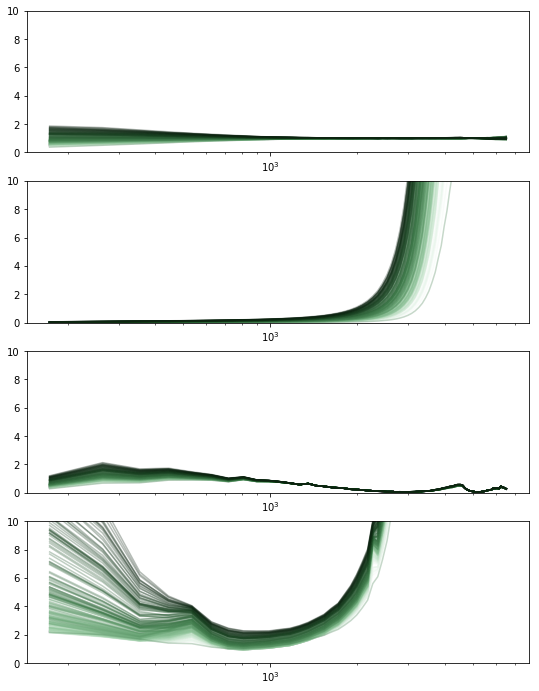

In [55]:
fig = plt.figure(figsize = (9,12), facecolor = 'w')

denom = ps_arrs[0,0].mean(axis=0)

for idx, c in enumerate(cmap):
    i = sorted_y_idxs[idx]
    plt.subplot(411)
    plt.plot(l,ps_arrs[0, i].mean(axis = 0)/denom, c = c, label = r'$\Omega_m=%0.2f$'%all_ys[i,0], alpha = 0.3)
    plt.subplot(412)
    plt.plot(l,ps_arrs[2, i].mean(axis = 0)/denom, c = c, alpha = 0.3)
    plt.subplot(413)
    plt.plot(l, ps_arrs[1, i].mean(axis = 0)/denom, c = c, alpha = 0.3)
    plt.subplot(414)
    plt.plot(l, ps_arrs[3, i].mean(axis = 0)/denom, c = c, alpha = 0.3)
    
#plt.legend(loc='best')
for i in range(4):
    plt.subplot(4,1,i+1)
    #plt.yscale('log')
    #plt.loglog()
    plt.xscale('log')
    plt.ylim([0.0,10.0]);
#plt.yscale('log');

NameError: name 'pdf_arrs' is not defined

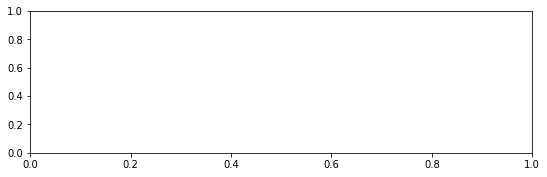

In [56]:
fig = plt.figure(figsize = (9,12), facecolor = 'w')


for idx, c in enumerate(cmap):
    i = sorted_y_idxs[idx]
    plt.subplot(411)
    plt.plot(nu,pdf_arrs[0, i].mean(axis = 0), c = c, label = r'$\Omega_m=%0.2f$'%all_ys[i,0], alpha = 0.3)
    plt.subplot(412)
    plt.plot(nu,pdf_arrs[2, i].mean(axis = 0), c = c, alpha = 0.3)
    plt.subplot(413)
    plt.plot(nu, pdf_arrs[1, i].mean(axis = 0), c = c, alpha = 0.3)
    plt.subplot(414)
    plt.plot(nu, pdf_arrs[3, i].mean(axis = 0), c = c, alpha = 0.3)
    
#plt.legend(loc='best')
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.yscale('log')
    #plt.loglog()
    #plt.ylim([1e-4,2]);
#plt.yscale('log');

In [ ]:
fig = plt.figure(figsize = (9,12), facecolor = 'w')

denom = pdf_arrs[0,0].mean(axis=0)

for idx, c in enumerate(cmap):
    i = sorted_y_idxs[idx]
    plt.subplot(411)
    plt.plot(nu,pdf_arrs[0, i].mean(axis = 0)/denom, c = c, label = r'$\Omega_m=%0.2f$'%all_ys[i,0], alpha = 0.3)
    plt.subplot(412)
    plt.plot(nu,pdf_arrs[2, i].mean(axis = 0)/denom, c = c, alpha = 0.3)
    plt.subplot(413)
    plt.plot(nu, pdf_arrs[1, i].mean(axis = 0)/denom, c = c, alpha = 0.3)
    plt.subplot(414)
    plt.plot(nu, pdf_arrs[3, i].mean(axis = 0)/denom, c = c, alpha = 0.3)
    
#plt.legend(loc='best')
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.yscale('log')
    #plt.loglog()
    plt.ylim([1e-4,1e2]);
#plt.yscale('log');

In [ ]:
from scipy.stats import skewtest, skew